In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create test set

In [2]:
all_features = pd.read_csv("instacart/all_features.csv")
all_features

,user_id,product_id,days_cumsum,num_prod_bought,days_since_last_bought,average_days_period,orders_since_last_bought,average_orders_period,dow_usually_bought,hod_usually_bought,...,num_prod_user_total,ratio_dist_prod_reordered,number_user_order,dow_user_usually_bought,hod_user_usually_bought,days_cumsum_user,average_daydiff_user,ratio_order_bought,num_user_prod_per_order,reordered_prod_per_order
0,3,248.0,9.0,1,NaN,NaN,NaN,NaN,3,19,...,88,0.575758,12,0,16,133.0,12.090909,0.083333,7.333333,0.625
1,3,1005.0,107.0,1,NaN,NaN,NaN,NaN,3,16,...,88,0.575758,12,0,16,133.0,12.090909,0.083333,7.333333,0.625
2,3,1819.0,76.0,3,7.0,13.0,1.0,1.5,0,15,...,88,0.575758,12,0,16,133.0,12.090909,0.250000,7.333333,0.625
3,3,7503.0,30.0,1,NaN,NaN,NaN,NaN,3,16,...,88,0.575758,12,0,16,133.0,12.090909,0.083333,7.333333,0.625
4,3,8021.0,9.0,1,NaN,NaN,NaN,NaN,3,19,...,88,0.575758,12,0,16,133.0,12.090909,0.083333,7.333333,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3231747,206205,43352.0,40.0,2,40.0,40.0,2.0,2.0,4,12,...,32,0.291667,3,2,12,40.0,20.000000,0.666667,10.666667,0.250
3231748,206205,44471.0,30.0,1,NaN,NaN,NaN,NaN,2,15,...,32,0.291667,3,2,12,40.0,20.000000,0.333333,10.666667,0.250
3231749,206205,46820.0,30.0,1,NaN,NaN,NaN,NaN,2,15,...,32,0.291667,3,2,12,40.0,20.000000,0.333333,10.666667,0.250
3231750,206205,49235.0,0.0,1,NaN,NaN,NaN,NaN,4,12,...,32,0.291667,3,2,12,40.0,20.000000,0.333333,10.666667,0.250


In [3]:
all_features = all_features[['user_id', 'product_id', 'days_cumsum', 'average_days_period', 'average_orders_period',
              'dow_usually_bought', 'hod_usually_bought', 'times_reordered', 'ratio_prod_bought_dep',
              'ratio_prod_bought_ais', 'ratio_order_bought_dep', 'ratio_order_bought_ais', 'ratio_dist_prod_reordered',
              'dow_user_usually_bought', 'hod_user_usually_bought', 'days_cumsum_user', 'average_daydiff_user', 
              'ratio_order_bought', 'num_user_prod_per_order', 'reordered_prod_per_order']]

In [4]:
sample_order_test = pd.read_csv("instacart/sample_order_test_cumsum.csv")
sample_order_test

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,days_cumsum
0,2774568,3,test,13,5,15,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.0
1,1411408,25,test,4,0,15,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0
2,707453,35,test,10,4,15,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0
3,882556,39,test,8,6,13,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0
4,2827745,45,test,5,5,10,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18189,3151043,206173,test,4,0,13,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0
18190,1836967,206182,test,11,0,10,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0
18191,2762353,206187,test,35,0,0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.0
18192,959487,206189,test,7,2,20,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0


In [5]:
test_order_details = (sample_order_test[['order_id', 'user_id', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'days_cumsum']]).drop_duplicates()
test_order_details

,order_id,user_id,order_dow,order_hour_of_day,days_since_prior_order,days_cumsum
0,2774568,3,5,15,11.0,144.0
1,1411408,25,0,15,30.0,90.0
2,707453,35,4,15,21.0,192.0
3,882556,39,6,13,7.0,79.0
4,2827745,45,5,10,3.0,63.0
...,...,...,...,...,...,...
18189,3151043,206173,0,13,9.0,69.0
18190,1836967,206182,0,10,20.0,203.0
18191,2762353,206187,0,0,20.0,348.0
18192,959487,206189,2,20,9.0,89.0


In [6]:
test_order_details.rename(columns={'days_cumsum': 'days_cumsum_order'}, inplace=True)
test_order_details

,order_id,user_id,order_dow,order_hour_of_day,days_since_prior_order,days_cumsum_order
0,2774568,3,5,15,11.0,144.0
1,1411408,25,0,15,30.0,90.0
2,707453,35,4,15,21.0,192.0
3,882556,39,6,13,7.0,79.0
4,2827745,45,5,10,3.0,63.0
...,...,...,...,...,...,...
18189,3151043,206173,0,13,9.0,69.0
18190,1836967,206182,0,10,20.0,203.0
18191,2762353,206187,0,0,20.0,348.0
18192,959487,206189,2,20,9.0,89.0


## Merge all features with test data

In [7]:
test_data = all_features.merge(test_order_details, how='inner', on=['user_id'])
test_data

,user_id,product_id,days_cumsum,average_days_period,average_orders_period,dow_usually_bought,hod_usually_bought,times_reordered,ratio_prod_bought_dep,ratio_prod_bought_ais,...,days_cumsum_user,average_daydiff_user,ratio_order_bought,num_user_prod_per_order,reordered_prod_per_order,order_id,order_dow,order_hour_of_day,days_since_prior_order,days_cumsum_order
0,3,248.0,9.0,NaN,NaN,3,19,0,0.111111,0.333333,...,133.0,12.090909,0.083333,7.333333,0.625000,2774568,5,15,11.0,144.0
1,3,1005.0,107.0,NaN,NaN,3,16,0,0.333333,1.000000,...,133.0,12.090909,0.083333,7.333333,0.625000,2774568,5,15,11.0,144.0
2,3,1819.0,76.0,13.0,1.5,0,15,2,0.750000,0.750000,...,133.0,12.090909,0.250000,7.333333,0.625000,2774568,5,15,11.0,144.0
3,3,7503.0,30.0,NaN,NaN,3,16,0,0.111111,0.333333,...,133.0,12.090909,0.083333,7.333333,0.625000,2774568,5,15,11.0,144.0
4,3,8021.0,9.0,NaN,NaN,3,19,0,1.000000,1.000000,...,133.0,12.090909,0.083333,7.333333,0.625000,2774568,5,15,11.0,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170653,206202,46908.0,269.0,NaN,NaN,3,14,0,0.333333,0.333333,...,269.0,12.809524,0.045455,9.000000,0.626263,2728930,2,17,6.0,275.0
1170654,206202,47553.0,269.0,NaN,NaN,3,14,0,0.333333,0.333333,...,269.0,12.809524,0.045455,9.000000,0.626263,2728930,2,17,6.0,275.0
1170655,206202,49191.0,0.0,NaN,NaN,2,12,0,0.035714,0.037037,...,269.0,12.809524,0.045455,9.000000,0.626263,2728930,2,17,6.0,275.0
1170656,206202,49386.0,55.0,7.0,1.0,1,0,1,0.086957,0.090909,...,269.0,12.809524,0.090909,9.000000,0.626263,2728930,2,17,6.0,275.0


In [8]:
product_features = pd.read_csv("instacart/product_features.csv")
product_features

,product_id,mean_days_prod_bought_period,mean_dow_prod_usually_bought,mean_hod_prod_usually_bought
0,1.0,48.940129,1,10
1,2.0,87.266667,0,11
2,3.0,20.043679,0,8
3,4.0,48.205556,0,14
4,6.0,NaN,6,20
...,...,...,...,...
46832,49684.0,28.000000,5,8
46833,49685.0,NaN,2,14
46834,49686.0,35.819444,6,9
46835,49687.0,81.000000,1,12


In [9]:
test_data = test_data.merge(product_features, how='left', on='product_id')
test_data

,user_id,product_id,days_cumsum,average_days_period,average_orders_period,dow_usually_bought,hod_usually_bought,times_reordered,ratio_prod_bought_dep,ratio_prod_bought_ais,...,num_user_prod_per_order,reordered_prod_per_order,order_id,order_dow,order_hour_of_day,days_since_prior_order,days_cumsum_order,mean_days_prod_bought_period,mean_dow_prod_usually_bought,mean_hod_prod_usually_bought
0,3,248.0,9.0,NaN,NaN,3,19,0,0.111111,0.333333,...,7.333333,0.625000,2774568,5,15,11.0,144.0,60.004888,0,11
1,3,1005.0,107.0,NaN,NaN,3,16,0,0.333333,1.000000,...,7.333333,0.625000,2774568,5,15,11.0,144.0,52.086957,1,11
2,3,1819.0,76.0,13.0,1.5,0,15,2,0.750000,0.750000,...,7.333333,0.625000,2774568,5,15,11.0,144.0,52.380919,0,10
3,3,7503.0,30.0,NaN,NaN,3,16,0,0.111111,0.333333,...,7.333333,0.625000,2774568,5,15,11.0,144.0,50.776104,0,9
4,3,8021.0,9.0,NaN,NaN,3,19,0,1.000000,1.000000,...,7.333333,0.625000,2774568,5,15,11.0,144.0,57.861817,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170653,206202,46908.0,269.0,NaN,NaN,3,14,0,0.333333,0.333333,...,9.000000,0.626263,2728930,2,17,6.0,275.0,29.717391,1,14
1170654,206202,47553.0,269.0,NaN,NaN,3,14,0,0.333333,0.333333,...,9.000000,0.626263,2728930,2,17,6.0,275.0,46.072306,0,10
1170655,206202,49191.0,0.0,NaN,NaN,2,12,0,0.035714,0.037037,...,9.000000,0.626263,2728930,2,17,6.0,275.0,40.121860,0,10
1170656,206202,49386.0,55.0,7.0,1.0,1,0,1,0.086957,0.090909,...,9.000000,0.626263,2728930,2,17,6.0,275.0,24.000000,0,0


## Create more features

In [10]:
def diff_dow(a,b):
    if(abs(a-b)<=3):
        return abs(a-b)
    return 7-abs(a-b)

In [11]:
test_data['dow_prod_usually_diff'] = test_data.apply(lambda x: diff_dow(x.dow_usually_bought, x.order_dow), axis=1)
test_data['dow_user_usually_diff'] = test_data.apply(lambda x: diff_dow(x.dow_user_usually_bought, x.order_dow), axis=1)
test_data

,user_id,product_id,days_cumsum,average_days_period,average_orders_period,dow_usually_bought,hod_usually_bought,times_reordered,ratio_prod_bought_dep,ratio_prod_bought_ais,...,order_id,order_dow,order_hour_of_day,days_since_prior_order,days_cumsum_order,mean_days_prod_bought_period,mean_dow_prod_usually_bought,mean_hod_prod_usually_bought,dow_prod_usually_diff,dow_user_usually_diff
0,3,248.0,9.0,NaN,NaN,3,19,0,0.111111,0.333333,...,2774568,5,15,11.0,144.0,60.004888,0,11,2.0,2.0
1,3,1005.0,107.0,NaN,NaN,3,16,0,0.333333,1.000000,...,2774568,5,15,11.0,144.0,52.086957,1,11,2.0,2.0
2,3,1819.0,76.0,13.0,1.5,0,15,2,0.750000,0.750000,...,2774568,5,15,11.0,144.0,52.380919,0,10,2.0,2.0
3,3,7503.0,30.0,NaN,NaN,3,16,0,0.111111,0.333333,...,2774568,5,15,11.0,144.0,50.776104,0,9,2.0,2.0
4,3,8021.0,9.0,NaN,NaN,3,19,0,1.000000,1.000000,...,2774568,5,15,11.0,144.0,57.861817,0,10,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170653,206202,46908.0,269.0,NaN,NaN,3,14,0,0.333333,0.333333,...,2728930,2,17,6.0,275.0,29.717391,1,14,1.0,2.0
1170654,206202,47553.0,269.0,NaN,NaN,3,14,0,0.333333,0.333333,...,2728930,2,17,6.0,275.0,46.072306,0,10,1.0,2.0
1170655,206202,49191.0,0.0,NaN,NaN,2,12,0,0.035714,0.037037,...,2728930,2,17,6.0,275.0,40.121860,0,10,0.0,2.0
1170656,206202,49386.0,55.0,7.0,1.0,1,0,1,0.086957,0.090909,...,2728930,2,17,6.0,275.0,24.000000,0,0,1.0,2.0


In [12]:
test_data['hod_prod_usually_diff'] = (test_data['hod_usually_bought'] - test_data['order_hour_of_day']).abs()
test_data['hod_user_usually_diff'] = (test_data['hod_user_usually_bought'] - test_data['order_hour_of_day']).abs()
test_data

,user_id,product_id,days_cumsum,average_days_period,average_orders_period,dow_usually_bought,hod_usually_bought,times_reordered,ratio_prod_bought_dep,ratio_prod_bought_ais,...,order_hour_of_day,days_since_prior_order,days_cumsum_order,mean_days_prod_bought_period,mean_dow_prod_usually_bought,mean_hod_prod_usually_bought,dow_prod_usually_diff,dow_user_usually_diff,hod_prod_usually_diff,hod_user_usually_diff
0,3,248.0,9.0,NaN,NaN,3,19,0,0.111111,0.333333,...,15,11.0,144.0,60.004888,0,11,2.0,2.0,4,1
1,3,1005.0,107.0,NaN,NaN,3,16,0,0.333333,1.000000,...,15,11.0,144.0,52.086957,1,11,2.0,2.0,1,1
2,3,1819.0,76.0,13.0,1.5,0,15,2,0.750000,0.750000,...,15,11.0,144.0,52.380919,0,10,2.0,2.0,0,1
3,3,7503.0,30.0,NaN,NaN,3,16,0,0.111111,0.333333,...,15,11.0,144.0,50.776104,0,9,2.0,2.0,1,1
4,3,8021.0,9.0,NaN,NaN,3,19,0,1.000000,1.000000,...,15,11.0,144.0,57.861817,0,10,2.0,2.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170653,206202,46908.0,269.0,NaN,NaN,3,14,0,0.333333,0.333333,...,17,6.0,275.0,29.717391,1,14,1.0,2.0,3,17
1170654,206202,47553.0,269.0,NaN,NaN,3,14,0,0.333333,0.333333,...,17,6.0,275.0,46.072306,0,10,1.0,2.0,3,17
1170655,206202,49191.0,0.0,NaN,NaN,2,12,0,0.035714,0.037037,...,17,6.0,275.0,40.121860,0,10,0.0,2.0,5,17
1170656,206202,49386.0,55.0,7.0,1.0,1,0,1,0.086957,0.090909,...,17,6.0,275.0,24.000000,0,0,1.0,2.0,17,17


In [13]:
test_data['days_since_prod_bought'] = test_data['days_cumsum_order'] - test_data['days_cumsum']
test_data['prod_bought_period_diff_mean'] = (test_data['days_since_prod_bought'] - test_data['mean_days_prod_bought_period']).abs()
test_data['prod_bought_period_diff_user'] = (test_data['days_since_prod_bought'] - test_data['average_days_period']).abs()
test_data['dow_prod_usually_diff_mean'] = (test_data['order_dow'] - test_data['mean_dow_prod_usually_bought']).abs()
test_data['hod_prod_usually_diff_mean'] = (test_data['order_hour_of_day'] - test_data['mean_hod_prod_usually_bought']).abs()
test_data['average_day_period_diff'] = (test_data['average_daydiff_user'] - test_data['days_since_prior_order']).abs()

test_data

,user_id,product_id,days_cumsum,average_days_period,average_orders_period,dow_usually_bought,hod_usually_bought,times_reordered,ratio_prod_bought_dep,ratio_prod_bought_ais,...,dow_prod_usually_diff,dow_user_usually_diff,hod_prod_usually_diff,hod_user_usually_diff,days_since_prod_bought,prod_bought_period_diff_mean,prod_bought_period_diff_user,dow_prod_usually_diff_mean,hod_prod_usually_diff_mean,average_day_period_diff
0,3,248.0,9.0,NaN,NaN,3,19,0,0.111111,0.333333,...,2.0,2.0,4,1,135.0,74.995112,NaN,5,4,1.090909
1,3,1005.0,107.0,NaN,NaN,3,16,0,0.333333,1.000000,...,2.0,2.0,1,1,37.0,15.086957,NaN,4,4,1.090909
2,3,1819.0,76.0,13.0,1.5,0,15,2,0.750000,0.750000,...,2.0,2.0,0,1,68.0,15.619081,55.0,5,5,1.090909
3,3,7503.0,30.0,NaN,NaN,3,16,0,0.111111,0.333333,...,2.0,2.0,1,1,114.0,63.223896,NaN,5,6,1.090909
4,3,8021.0,9.0,NaN,NaN,3,19,0,1.000000,1.000000,...,2.0,2.0,4,1,135.0,77.138183,NaN,5,5,1.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170653,206202,46908.0,269.0,NaN,NaN,3,14,0,0.333333,0.333333,...,1.0,2.0,3,17,6.0,23.717391,NaN,1,3,6.809524
1170654,206202,47553.0,269.0,NaN,NaN,3,14,0,0.333333,0.333333,...,1.0,2.0,3,17,6.0,40.072306,NaN,2,7,6.809524
1170655,206202,49191.0,0.0,NaN,NaN,2,12,0,0.035714,0.037037,...,0.0,2.0,5,17,275.0,234.878140,NaN,2,7,6.809524
1170656,206202,49386.0,55.0,7.0,1.0,1,0,1,0.086957,0.090909,...,1.0,2.0,17,17,220.0,196.000000,213.0,2,17,6.809524


In [14]:
test_data = test_data[['user_id', 'order_id', 'product_id', 'times_reordered', 'ratio_prod_bought_dep', 'ratio_prod_bought_ais',
               'ratio_order_bought_dep', 'ratio_order_bought_ais', 'ratio_dist_prod_reordered',
               'ratio_order_bought', 'num_user_prod_per_order',
               'reordered_prod_per_order', 'dow_prod_usually_diff', 
               'dow_user_usually_diff', 'hod_prod_usually_diff', 'hod_user_usually_diff',
               'prod_bought_period_diff_mean', 'prod_bought_period_diff_user',
               'dow_prod_usually_diff_mean', 'hod_prod_usually_diff_mean',
               'average_day_period_diff']]

In [15]:
test_data

,user_id,order_id,product_id,times_reordered,ratio_prod_bought_dep,ratio_prod_bought_ais,ratio_order_bought_dep,ratio_order_bought_ais,ratio_dist_prod_reordered,ratio_order_bought,...,reordered_prod_per_order,dow_prod_usually_diff,dow_user_usually_diff,hod_prod_usually_diff,hod_user_usually_diff,prod_bought_period_diff_mean,prod_bought_period_diff_user,dow_prod_usually_diff_mean,hod_prod_usually_diff_mean,average_day_period_diff
0,3,2774568,248.0,0,0.111111,0.333333,0.142857,0.333333,0.575758,0.083333,...,0.625000,2.0,2.0,4,1,74.995112,NaN,5,4,1.090909
1,3,2774568,1005.0,0,0.333333,1.000000,0.333333,1.000000,0.575758,0.083333,...,0.625000,2.0,2.0,1,1,15.086957,NaN,4,4,1.090909
2,3,2774568,1819.0,2,0.750000,0.750000,0.750000,0.750000,0.575758,0.250000,...,0.625000,2.0,2.0,0,1,15.619081,55.0,5,5,1.090909
3,3,2774568,7503.0,0,0.111111,0.333333,0.142857,0.333333,0.575758,0.083333,...,0.625000,2.0,2.0,1,1,63.223896,NaN,5,6,1.090909
4,3,2774568,8021.0,0,1.000000,1.000000,1.000000,1.000000,0.575758,0.083333,...,0.625000,2.0,2.0,4,1,77.138183,NaN,5,5,1.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170653,206202,2728930,46908.0,0,0.333333,0.333333,0.500000,0.500000,0.486486,0.045455,...,0.626263,1.0,2.0,3,17,23.717391,NaN,1,3,6.809524
1170654,206202,2728930,47553.0,0,0.333333,0.333333,0.500000,0.500000,0.486486,0.045455,...,0.626263,1.0,2.0,3,17,40.072306,NaN,2,7,6.809524
1170655,206202,2728930,49191.0,0,0.035714,0.037037,0.047619,0.047619,0.486486,0.045455,...,0.626263,0.0,2.0,5,17,234.878140,NaN,2,7,6.809524
1170656,206202,2728930,49386.0,1,0.086957,0.090909,0.181818,0.181818,0.486486,0.090909,...,0.626263,1.0,2.0,17,17,196.000000,213.0,2,17,6.809524


## Split data into target and to_predict set

In [16]:
target = test_data[['user_id', 'order_id', 'product_id']]
target

,user_id,order_id,product_id
0,3,2774568,248.0
1,3,2774568,1005.0
2,3,2774568,1819.0
3,3,2774568,7503.0
4,3,2774568,8021.0
...,...,...,...
1170653,206202,2728930,46908.0
1170654,206202,2728930,47553.0
1170655,206202,2728930,49191.0
1170656,206202,2728930,49386.0


In [17]:
to_predict = test_data.loc[:, ~test_data.columns.isin(['user_id', 'order_id', 'product_id'])]
to_predict

,times_reordered,ratio_prod_bought_dep,ratio_prod_bought_ais,ratio_order_bought_dep,ratio_order_bought_ais,ratio_dist_prod_reordered,ratio_order_bought,num_user_prod_per_order,reordered_prod_per_order,dow_prod_usually_diff,dow_user_usually_diff,hod_prod_usually_diff,hod_user_usually_diff,prod_bought_period_diff_mean,prod_bought_period_diff_user,dow_prod_usually_diff_mean,hod_prod_usually_diff_mean,average_day_period_diff
0,0,0.111111,0.333333,0.142857,0.333333,0.575758,0.083333,7.333333,0.625000,2.0,2.0,4,1,74.995112,NaN,5,4,1.090909
1,0,0.333333,1.000000,0.333333,1.000000,0.575758,0.083333,7.333333,0.625000,2.0,2.0,1,1,15.086957,NaN,4,4,1.090909
2,2,0.750000,0.750000,0.750000,0.750000,0.575758,0.250000,7.333333,0.625000,2.0,2.0,0,1,15.619081,55.0,5,5,1.090909
3,0,0.111111,0.333333,0.142857,0.333333,0.575758,0.083333,7.333333,0.625000,2.0,2.0,1,1,63.223896,NaN,5,6,1.090909
4,0,1.000000,1.000000,1.000000,1.000000,0.575758,0.083333,7.333333,0.625000,2.0,2.0,4,1,77.138183,NaN,5,5,1.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170653,0,0.333333,0.333333,0.500000,0.500000,0.486486,0.045455,9.000000,0.626263,1.0,2.0,3,17,23.717391,NaN,1,3,6.809524
1170654,0,0.333333,0.333333,0.500000,0.500000,0.486486,0.045455,9.000000,0.626263,1.0,2.0,3,17,40.072306,NaN,2,7,6.809524
1170655,0,0.035714,0.037037,0.047619,0.047619,0.486486,0.045455,9.000000,0.626263,0.0,2.0,5,17,234.878140,NaN,2,7,6.809524
1170656,1,0.086957,0.090909,0.181818,0.181818,0.486486,0.090909,9.000000,0.626263,1.0,2.0,17,17,196.000000,213.0,2,17,6.809524


# Predict

In [18]:
from catboost import CatBoostClassifier

from_file = CatBoostClassifier()
model = from_file.load_model('./model/first_model', format='cbm')
model

In [19]:
pred = model.predict_proba(to_predict)

In [20]:
pos_pred = pred[:,1]
pos_pred

array([0.22938204, 0.46834805, 0.59992081, ..., 0.07256923, 0.04349711,
       0.74988172])

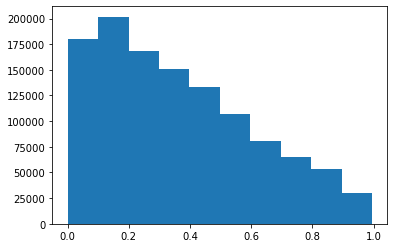

In [21]:
plt.hist(pos_pred);

In [22]:
target['pos_pred'] = pos_pred
target

<ipython-input-22-d3e814c7eef2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['pos_pred'] = pos_pred


,user_id,order_id,product_id,pos_pred
0,3,2774568,248.0,0.229382
1,3,2774568,1005.0,0.468348
2,3,2774568,1819.0,0.599921
3,3,2774568,7503.0,0.258744
4,3,2774568,8021.0,0.200467
...,...,...,...,...
1170653,206202,2728930,46908.0,0.251099
1170654,206202,2728930,47553.0,0.223782
1170655,206202,2728930,49191.0,0.072569
1170656,206202,2728930,49386.0,0.043497


In [23]:
target['product_id_str'] = target['product_id'].astype(int).astype(str)
target

<ipython-input-23-c8971b20b8c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['product_id_str'] = target['product_id'].astype(int).astype(str)


,user_id,order_id,product_id,pos_pred,product_id_str
0,3,2774568,248.0,0.229382,248
1,3,2774568,1005.0,0.468348,1005
2,3,2774568,1819.0,0.599921,1819
3,3,2774568,7503.0,0.258744,7503
4,3,2774568,8021.0,0.200467,8021
...,...,...,...,...,...
1170653,206202,2728930,46908.0,0.251099,46908
1170654,206202,2728930,47553.0,0.223782,47553
1170655,206202,2728930,49191.0,0.072569,49191
1170656,206202,2728930,49386.0,0.043497,49386


## use threshold of 0.74

In [24]:
target['pred'] = 0
target.loc[target['pos_pred']>0.74, 'pred'] = 1
target

<ipython-input-24-acae731b967c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['pred'] = 0
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,user_id,order_id,product_id,pos_pred,product_id_str,pred
0,3,2774568,248.0,0.229382,248,0
1,3,2774568,1005.0,0.468348,1005,0
2,3,2774568,1819.0,0.599921,1819,0
3,3,2774568,7503.0,0.258744,7503,0
4,3,2774568,8021.0,0.200467,8021,0
...,...,...,...,...,...,...
1170653,206202,2728930,46908.0,0.251099,46908,0
1170654,206202,2728930,47553.0,0.223782,47553,0
1170655,206202,2728930,49191.0,0.072569,49191,0
1170656,206202,2728930,49386.0,0.043497,49386,0


In [25]:
target['pred'].value_counts()

0    1052244
1     118414
Name: pred, dtype: int64

In [26]:
result = target[target['pred']==1][['order_id', 'product_id_str']]
result

,order_id,product_id_str
9,2774568,16797
11,2774568,17668
13,2774568,18599
15,2774568,21903
23,2774568,39190
...,...,...
1170586,2728930,432
1170589,2728930,2693
1170625,2728930,24852
1170627,2728930,26620


In [27]:
result.groupby(['order_id'])['product_id_str'].count()

order_id
182         7
414        11
437         6
492        21
758         1
           ..
3419743     4
3419878     4
3420390    10
3420544    10
3420702     6
Name: product_id_str, Length: 16374, dtype: int64

# Create final prediction

## Group the same order_id together

In [28]:
result['product_id_str'] = result.groupby(['order_id'])['product_id_str'].transform(lambda x : ' '.join(x)) 
  
# drop duplicate data 
result = result.drop_duplicates()   
result

,order_id,product_id_str
9,2774568,16797 17668 18599 21903 39190 43961 47766
53,707453,694 4942 6111 18150 21137 21903 24852 28156 32...
143,882556,1870 5373 5450 7371 8424 9076 24852 25890 2820...
211,2827745,17924
238,320326,24852 35163 41896 42828 45646
...,...,...
1170406,3151043,9477 15003 25283
1170436,1836967,10279 15324 23909 25570 39921 41362
1170505,2762353,5652 8277 8555 10385 21405 21982 24184 34429 3...
1170565,959487,9623 15902 18205 24456 27043 34991


In [29]:
test_order_details[['order_id']]

,order_id
0,2774568
1,1411408
2,707453
3,882556
4,2827745
...,...
18189,3151043
18190,1836967
18191,2762353
18192,959487


## Combine with users that reorder nothing

In [31]:
final_result = result.merge(test_order_details[['order_id']], how='outer', on='order_id')
final_result

,order_id,product_id_str
0,2774568,16797 17668 18599 21903 39190 43961 47766
1,707453,694 4942 6111 18150 21137 21903 24852 28156 32...
2,882556,1870 5373 5450 7371 8424 9076 24852 25890 2820...
3,2827745,17924
4,320326,24852 35163 41896 42828 45646
...,...,...
18189,433171,NaN
18190,1048017,NaN
18191,3030968,NaN
18192,2800565,NaN


In [33]:
final_result.fillna('None', inplace=True)
final_result

,order_id,product_id_str
0,2774568,16797 17668 18599 21903 39190 43961 47766
1,707453,694 4942 6111 18150 21137 21903 24852 28156 32...
2,882556,1870 5373 5450 7371 8424 9076 24852 25890 2820...
3,2827745,17924
4,320326,24852 35163 41896 42828 45646
...,...,...
18189,433171,None
18190,1048017,None
18191,3030968,None
18192,2800565,None


# Result

In [35]:
final_result.rename(columns={'product_id_str': 'products'}, inplace=True)
final_result

,order_id,products
0,2774568,16797 17668 18599 21903 39190 43961 47766
1,707453,694 4942 6111 18150 21137 21903 24852 28156 32...
2,882556,1870 5373 5450 7371 8424 9076 24852 25890 2820...
3,2827745,17924
4,320326,24852 35163 41896 42828 45646
...,...,...
18189,433171,None
18190,1048017,None
18191,3030968,None
18192,2800565,None


In [36]:
final_result.to_csv("instacart/test_result.csv", index=False)